# Simulations 

#### Simulations are a major component in modern chemistry which refers to the use of computer programs to model and predict the behaviors of chemical sytems and reactions. Simulations are beside experimentation the major method for designing, analyzing and optimizing chemical process. The ability of stimulations to reflect real process behavior strongly depends on model quality. Simulations helps in understanding the molecular structure, properties and reactivity of chemical substances. This enables researcher to study complex chemical processes, design new materials and optimize reaction conditions.

#### Simulations do not need represent every aspect of the real world as long as the omitted details do not reduce the accuracy or precision to a level that the simulation is no longer useful. Modern chemical simulations are often quite complex and are performed with a range of free or commercial software. In this manuscript, we will discuss about different simulations with simple methodologies that can be easily coded in Python using standard libraries such as NumPy, SciPy and matplotlib.

## Deterministic Simulations

#### Deterministic simulations are computer based models that are use mathemaical algorigthms and equations to simulate and predict the behavior of complex systems. It simulate with no random variables with fixed outcomes dedicated by the code and input parameters. They produce same outcomes if they are run multiple times with same input and parameters. However, it is important to note that deternistic simulations are not always an accurate representation of real-world sytems, as they may not account for all factors that can affect the behavior of the system. Even though many physical and chemical process are driven by randomness, such as the random movements and collision of molecules, it makes the randomness conform to predictable pattern which can be seen in Nuclear Magnetic Resonance (NMR) spilliting pattern and chemical kinematics among many others below.



### Nuclear Magnetic Resonance Splitting (NMR)

#### In $^1{H}$ NMR the splitting of spectral peaks is a result of the interaction between the magnetic field of the observed proton and neighboring protons in the molecule. The spins of neighboring protons can have either a +1/2 or -1/2 which alterrs the magnetic field around the observed proton and lead it to splitting of the spectral peak. The distribution of spins of neighbouring protons are random but due to the large number of molecules present in the sample, the ratio approaches theoretically 1:1. As a result, this splitting pattern can be modeled by splitting deterministically each peak into a doublet for every neighboring proton.

#### A function is defined below which generates the splitting pattern in a recursive manner generated by equivalent protons. In this function the peaks will be splitted into doublets and the process will be repeated if there will be multiple equivalent neighboring protons. The function takes in the chemical shift of the peaks(s) (peaks), the number of equivalent neighbouring protons (n), the coupling constant (J) in Hz, and the frequency of observation (freq) in MHz: and it returns a list of the split peaks in ppm. The function below also includes the validity checks to ensure the user-provided parameters what the function expects.

In [14]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
def split(peaks, n, J, freq=400):
    '''(list, int, float, freq=num) -> list
    Takes in a list of peak ppm values for a single 
    resonance(peaks),the number of identical neighboring 
    protons(n), the coupling constant (J) in Hz, and the 
    frequency of observation (freq) in MHz and returns a 
    list of ppm values for all peaks in the splitting pattern.
    '''
    # check validity of input values
    if not isinstance(peaks, list):
        peaks = list([peaks])
    if not isinstance(n, int):
        print('Error: n must be an integer.')
        return None
    
    # split the peak(s)
    J_ppm  = J / freq
    new_peaks = []
    for peak in peaks:
        new_peaks.extend([peak + 0.5 * J_ppm, peak - 0.5 * J_ppm])
        
    n =n - 1
    
    # perform next split or return result
    if n > 0:
        return split(new_peaks, n, J, freq=freq)
    else:
        return new_peaks
split(1.00, 2, J=3.4, freq=400)

[1.0085000000000002, 1.0, 1.0, 0.9915]

#### In the above function, we considered the initial peak at chemical shift of 1.00 pm which splitted into four peaks due to the coupling with two neighbouring protons with a coupling constant of 3.4 Hz at 400 MHz frequency of observation. We see that two peaks are at chemical shift of 1.00 ppm and two peaks have slightly different chemical shift of 1.0085 and 0.9915 ppm. When we will visualize as line plot with binned peaks, the peak at chemical shift 1.00 ppm would be twice the magnitude of the other two peaks. This is due to the presence of two peaks at the same chemical shift. The plot for the biined peaks in shown below. 

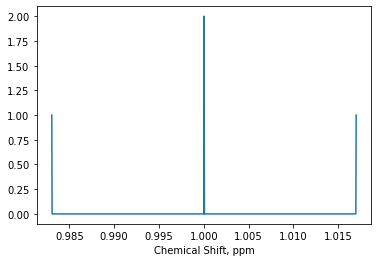

In [18]:
signal, ppm = np.histogram(split([1.00], 2, J=6.8), bins=1000)
plt.plot(ppm[1:], signal)
plt.xlabel('Chemical Shift, ppm')
plt.savefig("Chemical_shift_with_binned_peaks.pdf", dpi=400,  bbox_inches='tight')

#### If we have multiple inequivalent groups, the splitting patterns becomes more complex due to additional coupling constant. This can be simulted by nesting the split() function and providing different coupling constant value. Below figure and function is used to simulate a splitting pattern of proton coupled with two protons with J = 9.8 Hz and another proton with J = 10.8 whicg generate a double of triplets.

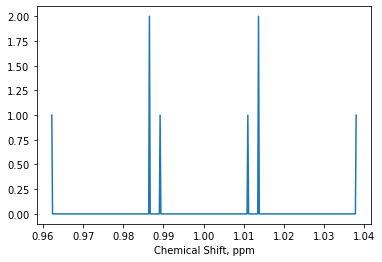

In [19]:
signal, ppm = np.histogram(split(split([1.00], 1,  J=10.8), 2, J=9.8), bins=400)
plt.plot(ppm[1:], signal)
plt.xlabel('Chemical Shift, ppm')
plt.savefig("Chemical_shift_with_different_coupling_constant.pdf", dpi=400,  bbox_inches='tight')